In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [9]:
import os, sys
sys.path.append(os.path.join(os.path.expanduser('~'), 'Documents/Coding/Python/'))
# sys.path

from lonelyboy.geospatial import plots as gsplt
from lonelyboy.geospatial import preprocessing as gspp
from lonelyboy.timeseries import lbtimeseries as tspp
# from lonelyboy.geospatial import group_patterns as gsgp

import psycopg2
import psycopg2.extras

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
import PyQt5
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

get_ipython().magic('matplotlib qt')
# get_ipython().magic('matplotlib inline')

In [3]:
PLT_FIG_WIDTH = 3.787
PLT_FIG_HEIGHT = PLT_FIG_WIDTH / 1.618

In [4]:
%%time
properties = configparser.ConfigParser()
properties.read(os.path.join('.','sql_server.ini'))
properties = properties['SERVER']

host    = properties['host']
db_name = properties['db_name']
uname   = properties['uname']
pw      = properties['pw']
port    = properties['port']

con = psycopg2.connect(database=db_name, user=uname, password=pw, host=host, port=port)

Wall time: 21.3 s


In [5]:
# fisheries_trips = pd.read_csv('../fisheries_dynamic.csv')
fisheries_trips = pd.read_csv('../fisheries_dynamic_real_points_v3.csv')

In [6]:
fisheries_trips.mmsi.unique()

array([227443000, 227472000, 228037600, 228131600, 228133000, 228195000,
       228236600, 228843000, 228931000, 228947000, 226216000, 227142200,
       227319570, 227867000, 227941000, 228160000, 228167900, 228190600,
       228236700, 227366000, 227483000, 227635680, 228070700, 228138000,
       228208800, 228302900, 228370000, 228376000, 228380000, 227307000,
       227485000, 227592000, 228004600, 228213700, 228218700, 228293000,
       228306000, 228374000, 228929000, 226178000, 226179000, 227314000,
       227364000, 227397000, 227583000, 227827000, 228174600, 228219000,
       228236000, 227114300, 227300000, 227474000, 228144000, 228203800,
       228205800, 228264000, 228267900, 227116100, 228020600, 228109000,
       228208700, 228258000, 228332000, 228336000, 228387000, 228827000,
       226084000, 227311000, 227372000, 227411000, 227577000, 227820000,
       228033800, 228130000, 228240000, 228917000, 226177000, 227312180,
       227347000, 227575000, 227988000, 228042600, 

In [17]:
tmp = fisheries_trips.loc[fisheries_trips.mmsi == 227650230]
tmp = gspp.gdf_from_df(tmp)

C:\Users\This PC\Documents/Coding/Python\lonelyboy\geospatial\preprocessing.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['geom'] = np.nan
C:\Users\This PC\.conda\envs\gis\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
tmp = pd.read_sql_query('SELECT id,mmsi,turn,speed,course,heading,lon,lat,ts,traj_id, trip_id FROM ais_data.dynamic_ships_min_trip_card_3_segmented_12h WHERE mmsi = %s'%(227650230,),con=con)
tmp = gspp.gdf_from_df(tmp)
tmp.head()

,id,mmsi,turn,speed,course,heading,lon,lat,ts,traj_id,trip_id,geom
0,8617143,227650230,0.0,10.9,161.4,511,-4.810788,48.360935,1446368031,0,0,POINT (-4.810788 48.360935)
1,8617148,227650230,0.0,7.4,75.4,511,-4.716818,48.321810,1446370399,0,0,POINT (-4.7168183 48.32181)
2,8617151,227650230,0.0,6.9,82.2,511,-4.715395,48.321968,1446370429,0,0,POINT (-4.715395 48.321968)
3,8617156,227650230,0.0,6.8,78.5,511,-4.701118,48.323414,1446370730,0,0,POINT (-4.7011185 48.323414)
4,8617158,227650230,0.0,6.7,86.5,511,-4.689718,48.324480,1446370969,0,0,POINT (-4.6897182 48.32448)


In [105]:
gsplt.map_plot(tmp)

# Fig. Before & After Resampling

In [39]:
cmap = plt.cm.tab20

# TRIP_ID = 28
TRIP_ID = 33
# TRIP_ID = 80
# TRIP_ID = 75
bg_color = 'lightblue'

# fig, ax = plt.subplots(figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), facecolor=bg_color)
fig, ax = plt.subplots(figsize=(3, PLT_FIG_HEIGHT), facecolor=bg_color)
ax.set_facecolor(bg_color)
tmp2 = tmp.loc[tmp.trip_id == TRIP_ID].sort_values(['ts'])

# tmp2 = tmp2.iloc[len(tmp2)//2:]

# tmp2.plot(ax=ax, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color=cmap(0), markersize=9)
tmp2.plot(ax=ax, figsize=(3, PLT_FIG_HEIGHT), color=cmap(0), markersize=9)


plt.axis('off')
plt.margins(0)
plt.savefig(os.path.join('..', 'BeforeResamplingV10.pdf'), dpi=300, facecolor=bg_color, pad_inches=0)



tmp3 = gspp.resample_geospatial(tmp2, features=['mmsi', 'course', 'lon', 'lat', 'ts', 'trip_id'])
# df = pd.merge(tmp2, tmp3, how='left', on=['lon', 'lat'], suffixes=('', '_y'))
# df = df[df.isna().any(axis=1)]

fig2, ax2 = plt.subplots(figsize=(3, PLT_FIG_HEIGHT), facecolor=bg_color)
# fig2, ax2 = plt.subplots(figsize=(PLT_FIG_HEIGHT, PLT_FIG_HEIGHT), facecolor=bg_color)
ax2.set_facecolor(bg_color)
# tmp3.plot(ax=ax2, figsize=(PLT_FIG_HEIGHT, PLT_FIG_HEIGHT), color=cmap(0), markersize=9)
tmp3.plot(ax=ax2, figsize=(3, PLT_FIG_HEIGHT), color=cmap(0), markersize=9)

# ax2 = tmp3.loc[tmp3.real_point == 0].plot(ax=ax2, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color='skyblue', markersize=9)
# tmp3.loc[tmp3.real_point == 1].plot(ax=ax2, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color='red', markersize=9)
# df.plot(ax=ax2, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color='black', marker='x', markersize=10)

plt.axis('off')
plt.margins(0.02)
plt.savefig(os.path.join('..', 'AfterResamplingV10.pdf'), dpi=300, facecolor=bg_color, pad_inches=0)

# out = pd.cut(tmp2, bins=9, precision=0) 

# ax = out.value_counts(sort=False).plot.bar(figsize=(PLT_FIG_WIDTH,PLT_FIG_HEIGHT), fontsize=8, width=0.75, cmap='tab20', rot=35)
# ax.set_xticklabels([str(c).split(' ')[1].split(']')[0] for c in out.cat.categories])

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.suptitle(r'\textbf{Sampling Rate Histogram for a \newline Random Trajectory Before Resampling}', fontsize=8, y=1.07)
# plt.xlabel(r'', fontsize=8)
# plt.ylabel(r'\textbf{Absolute Frequency}', fontsize=8)

# plt.savefig(os.path.join('.', 'Zenodo-fishing-analytics-thesis-report', 'res', 'BeforeResampling.pdf'), dpi=300, bbox_inches='tight')

In [38]:
from shapely.geometry import LineString

cmap = plt.cm.tab20

TRIP_ID = 33

PLT_FIG_WIDTH = 3.787
PLT_FIG_HEIGHT = PLT_FIG_WIDTH / 1.618


fig, ax = plt.subplots(figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT))
tmp2 = tmp.loc[tmp.trip_id == TRIP_ID].sort_values(['ts'])
df = tmp2.groupby(['mmsi'])['geom'].apply(lambda x: LineString(x.tolist()))
df = gpd.GeoDataFrame(df, geometry='geom')

tmp3 = gspp.resample_geospatial(tmp2, features=tmp2.columns[1:-1])

df.plot(linestyle='--', ax=ax, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color=cmap(0), linewidth=2, zorder=1)
tmp3.plot(ax=ax, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color='red', markersize=7, marker='o', zorder=2)

# df.plot(linestyle='-', ax=ax, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color=cmap(2), linewidth=2, zorder=1)
# tmp3.plot(ax=ax, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color='darkred', markersize=10, marker='o', zorder=2)
# df.plot(linestyle='-', ax=ax, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color='turquoise', linewidth=2, zorder=1)
# tmp3.plot(ax=ax, figsize=(PLT_FIG_WIDTH, PLT_FIG_HEIGHT), color='darkred', markersize=10, marker='o', zorder=2)

plt.legend(['Real Trip', 'Resampled Trip'], fontsize='small', loc='lower center', bbox_to_anchor=(0.42, -0.4),
          fancybox=False, shadow=False, frameon=False, ncol=2)

plt.axis('off')
plt.margins(0.02)
plt.savefig(os.path.join('..', 'BeforeAfterResamplingV11.pdf'), dpi=300, bbox_inches='tight', pad_inches=0)

# RESAMPLING STATS

In [5]:
%%time
host    = 'snf-863583.vm.okeanos.grnet.gr'
db_name = 'zenodo'
uname   = 'students'
pw      = 'infol@bdbl@bs2017'
port    = '46132'

con = psycopg2.connect(database=db_name, user=uname, password=pw, host=host, port=port)

Wall time: 171 ms


In [22]:
query = f'select count(*) from ais_data.dynamic_ships_min_trip_card_3_segmented_12h'
stat_tmp = pd.read_sql(query, con=con)

In [23]:
stat_tmp

,count
0,9527006


In [24]:
data = stat_tmp.values.flatten().tolist()
for i in [1,2,5,10]:
    query = f'select count(*) from ais_data.dynamic_ships_min_trip_card_3_segmented_12h_resampled_{i}min'
    stat_tmp = pd.read_sql(query, con=con)
    data.extend(stat_tmp.values.flatten().tolist())
data

[9527006, 7137246, 3580866, 1446326, 734627]

In [36]:
df = pd.DataFrame({'dataset':['D0',
                              'D1', 
                              'D2',
                              'D5',
                              'D10'], 
                   'description':['The original cleansed after cleansing, variable sampling rate',
                                  'D0 after resampling, sampling rate = 1 min.',
                                  'D0 after resampling, sampling rate = 2 min.',
                                  'D0 after resampling, sampling rate = 5 min.',
                                  'D0 after resampling, sampling rate = 10 min.'], '#records':data})
df

,dataset,description,#records
0,D0,"The original cleansed after cleansing, variabl...",9527006
1,D1,"D0 after resampling, sampling rate = 1 min.",7137246
2,D2,"D0 after resampling, sampling rate = 2 min.",3580866
3,D5,"D0 after resampling, sampling rate = 5 min.",1446326
4,D10,"D0 after resampling, sampling rate = 10 min.",734627


In [37]:
print(df.to_latex(index=False))

'\\begin{tabular}{llr}\n\\toprule\ndataset &                                        description &  \\#records \\\\\n\\midrule\n     D0 &  The original cleansed after cleansing, variabl... &   9527006 \\\\\n     D1 &        D0 after resampling, sampling rate = 1 min. &   7137246 \\\\\n     D2 &        D0 after resampling, sampling rate = 2 min. &   3580866 \\\\\n     D5 &        D0 after resampling, sampling rate = 5 min. &   1446326 \\\\\n    D10 &       D0 after resampling, sampling rate = 10 min. &    734627 \\\\\n\\bottomrule\n\\end{tabular}\n'

# SEGMENTATION STATS

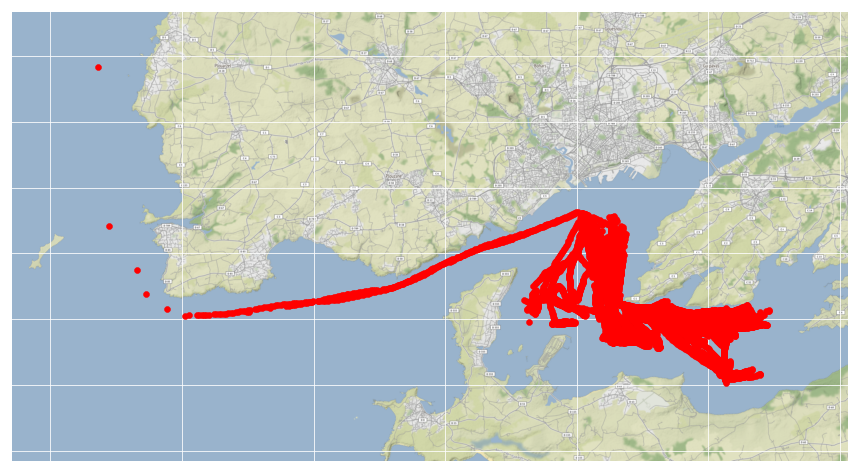

In [41]:
gsplt.map_plot(tmp)

In [43]:
tmp

,mmsi,course,lon,lat,ts,velocity,trip_id,datetime,geom
2491845,227650230,161.4,-4.810788,48.360935,1446368031,9.286377,0,2015-11-01 08:53:51,POINT (-4.810788 48.360935)
2491846,227650230,75.4,-4.716818,48.321810,1446370399,10.317251,0,2015-11-01 09:33:19,POINT (-4.7168183 48.32181)
2491847,227650230,82.2,-4.715395,48.321968,1446370429,10.303951,0,2015-11-01 09:33:49,POINT (-4.715395 48.321968)
2491848,227650230,78.5,-4.701118,48.323414,1446370730,10.354836,0,2015-11-01 09:38:50,POINT (-4.7011185 48.323414)
2491849,227650230,86.5,-4.689718,48.324480,1446370969,10.379825,0,2015-11-01 09:42:49,POINT (-4.6897182 48.32448)
2491850,227650230,85.9,-4.688285,48.324627,1446370999,10.397114,0,2015-11-01 09:43:19,POINT (-4.688285 48.324627)
2491851,227650230,79.7,-4.686895,48.324745,1446371028,0.000000,0,2015-11-01 09:43:48,POINT (-4.686895 48.324745)
2491852,227650230,79.7,-4.686895,48.324745,1446371029,10.675298,0,2015-11-01 09:43:49,POINT (-4.686895 48.324745)
2491853,227650230,76.6,-4.685420,48.324886,1446371059,10.457416,0,2015-11-01 09:44:19,POINT (-4.68542 48.324886)
2491854,227650230,78.3,-4.683977,48.325040,1446371089,9.827249,0,2015-11-01 09:44:49,POINT (-4.6839767 48.32504)


# OLD PLOTS

In [ ]:
tmp = traj.ts.diff()
out = pd.cut(tmp, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, tmp.max()], precision=0) 

ax = out.value_counts(sort=False).plot.bar(figsize=(PLT_FIG_WIDTH,PLT_FIG_HEIGHT), fontsize=8, width=0.75, cmap='tab20', rot=35)
ax.set_xticklabels([str(c).split(' ')[1].split(']')[0] for c in out.cat.categories])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle(r'\textbf{Sampling Rate Histogram for a \newline Random Trajectory Before Resampling}', fontsize=8, y=1.07)
plt.xlabel(r'', fontsize=8)
plt.ylabel(r'\textbf{Absolute Frequency}', fontsize=8)

# plt.savefig(os.path.join('..', 'BeforeResamplingOnCleanedData.pdf'), dpi=300, bbox_inches='tight')

In [48]:
plt.figure(2)
tmp2 = tmp.loc[(tmp.trip_id == TRIP_ID)].sort_values(['ts']).ts.diff()
out = pd.cut(tmp2, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, tmp2.max()], precision=0) 

ax = out.value_counts(sort=False).plot.bar(figsize=(PLT_FIG_WIDTH,PLT_FIG_HEIGHT), fontsize=8, width=0.75, cmap='tab20', rot=35)
ax.set_xticklabels([str(c).split(' ')[1].split(']')[0] for c in out.cat.categories])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle(r'\textbf{Sampling Rate Histogram for a \newline Random Trajectory After Resampling}', fontsize=8, y=1.07)
plt.xlabel(r'', fontsize=8)
plt.ylabel(r'\textbf{Absolute Frequency}', fontsize=8)

plt.savefig(os.path.join('..', 'AfterResamplingV2.pdf'), dpi=300, bbox_inches='tight')